In [35]:
# First we import our libraries, we must use sklearn for our classification problem.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
#Load the two CSV as dataframe.
train_data = pd.read_csv('/content/drive/MyDrive/RATTRAPAGE_MA412/Ma412/Train_Test_data/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/RATTRAPAGE_MA412/Ma412/Train_Test_data/test.csv')
train_head = train_data.head()
test_head = test_data.head()

test_head

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


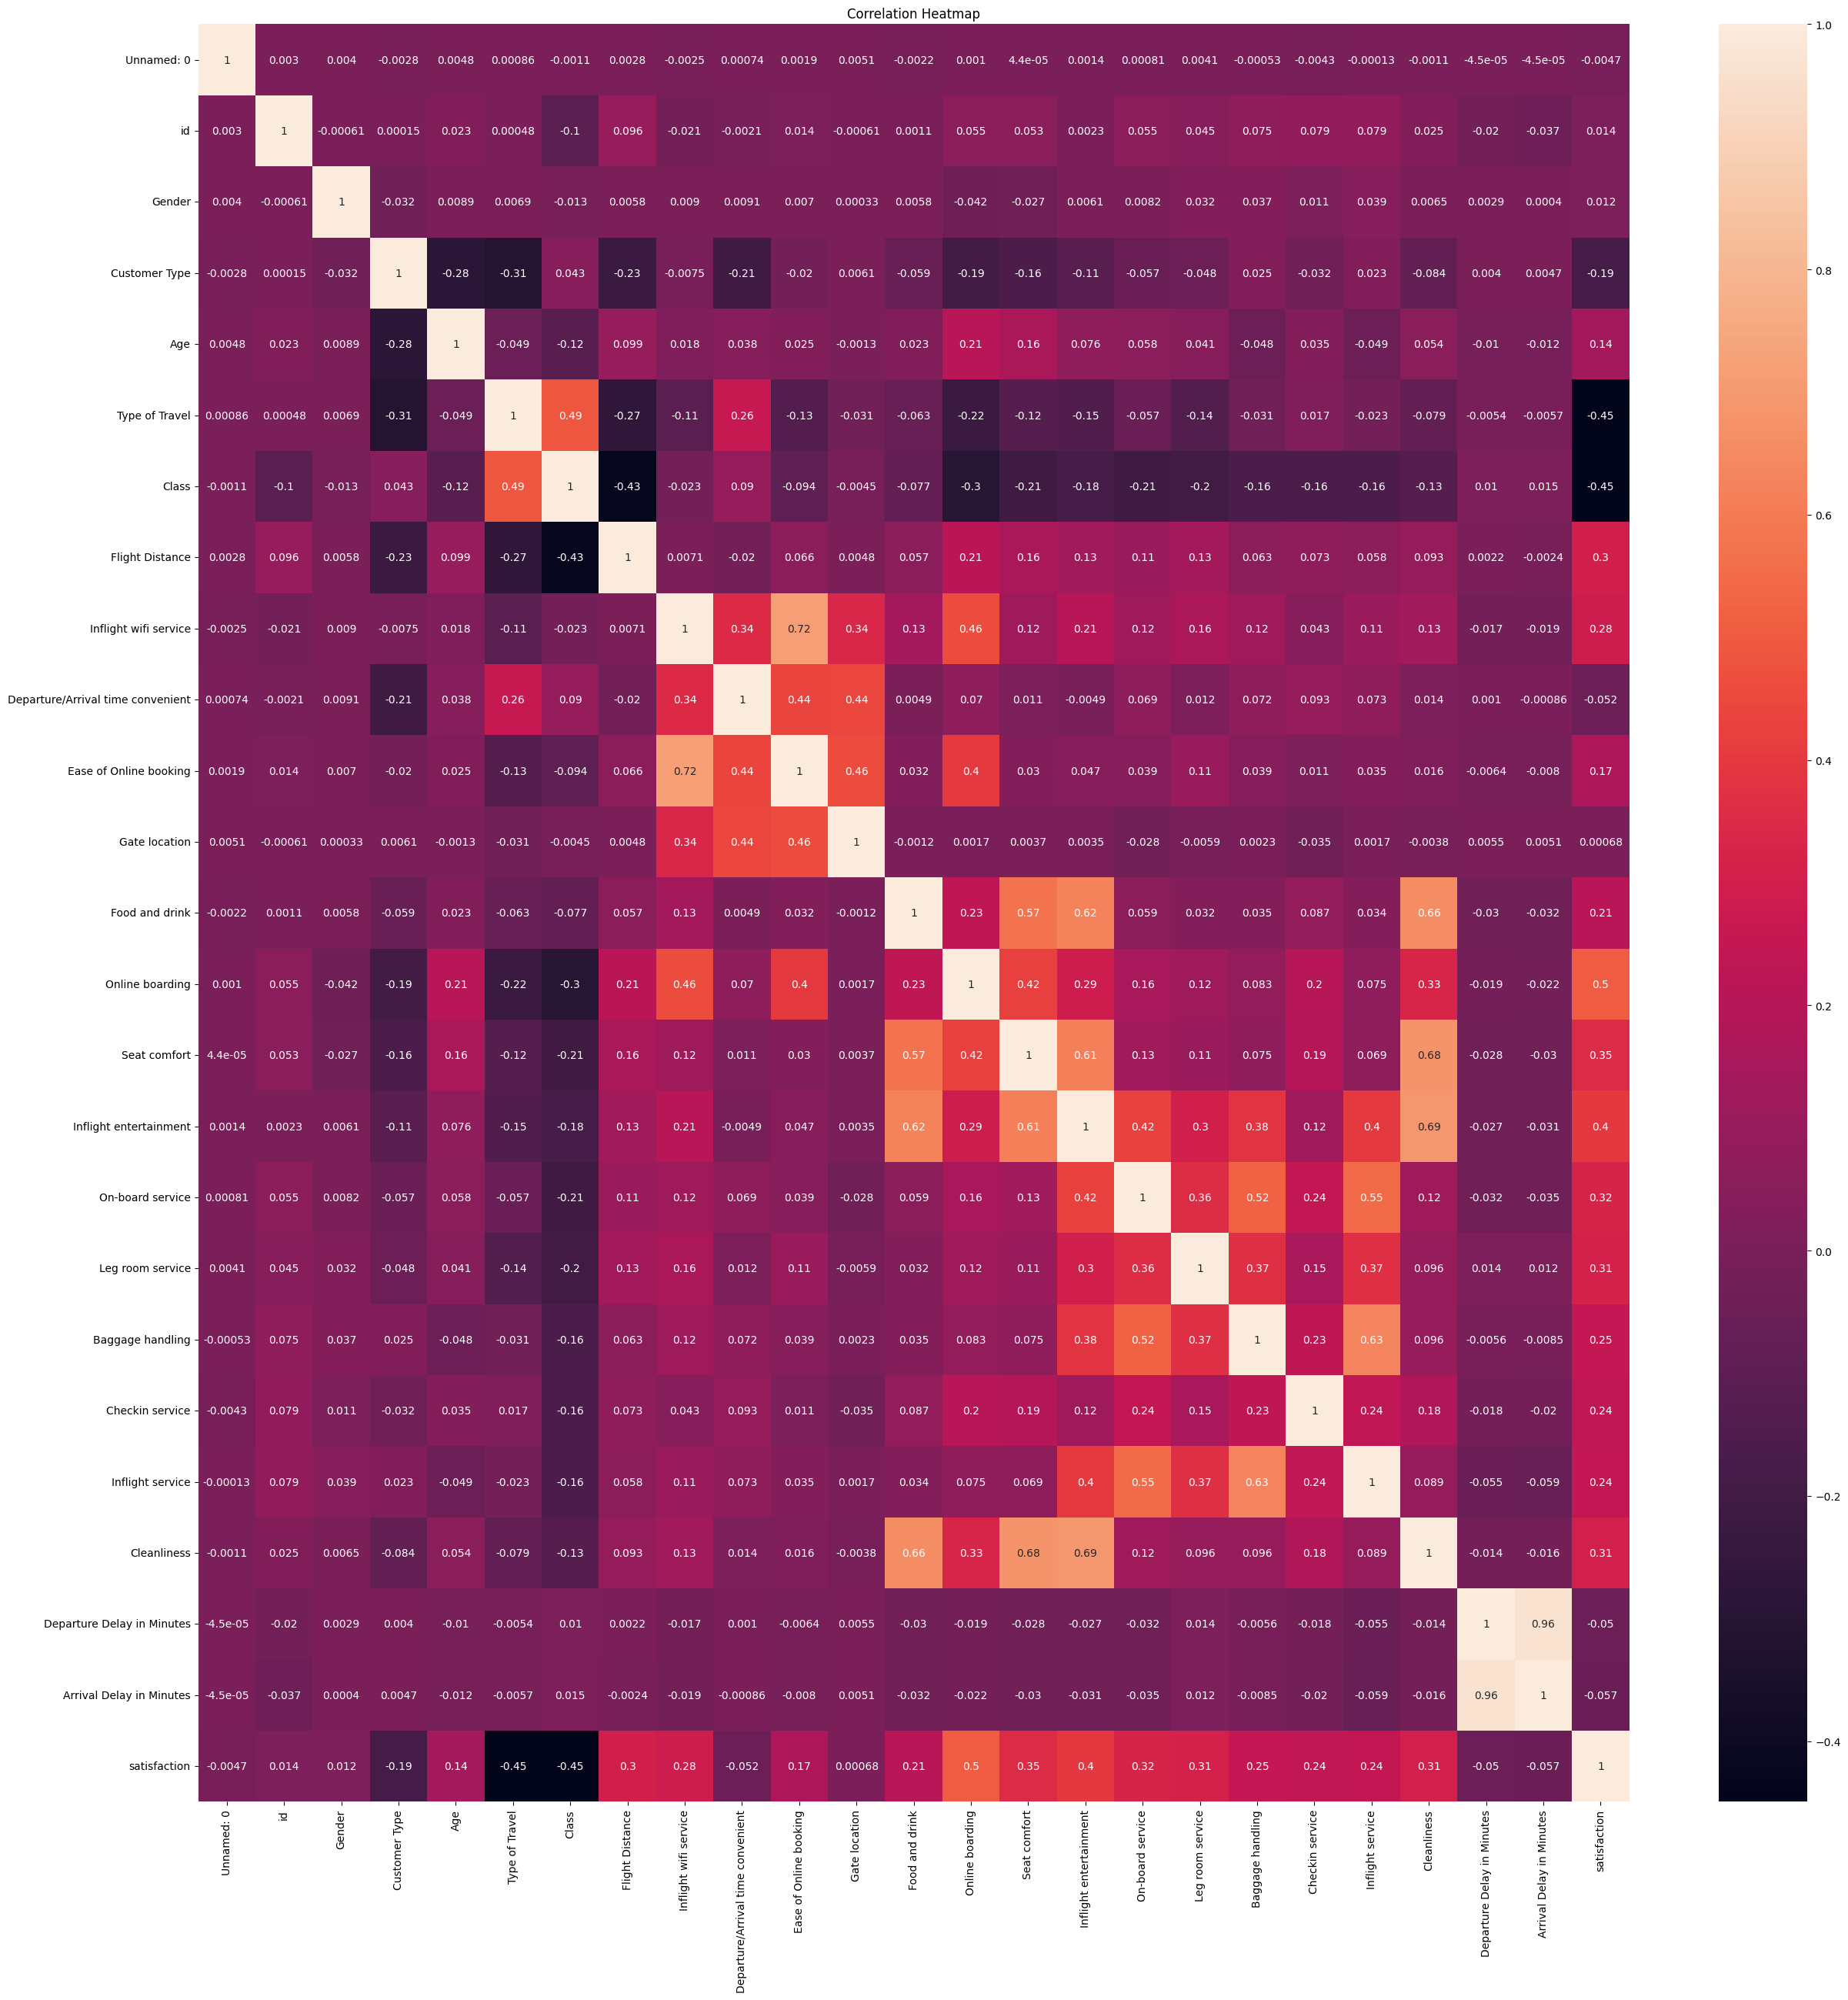

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/RATTRAPAGE_MA412/Ma412/Train_Test_data/train.csv")  # Replace with your data loading method

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())


# Encode categorical variables
label_encoders = {}
for column in categorical_cols:
  le = LabelEncoder()
  data[column] = le.fit_transform(data[column])
  label_encoders[column] = le

# Calculate the correlation matrix
correlation_matrix = data.corr()

# **Solution 1: Using plt.subplots**
# Create a figure of desired size
fig, ax = plt.subplots(figsize=(30, 30))  # Adjust width and height

# Create the heatmap using Seaborn on the created axis
sns.heatmap(correlation_matrix, annot=True, ax=ax)

# **Solution 2: Using fig.set_size_inches (uncomment if preferred)**
# # Create the heatmap using Seaborn
# heatmap = sns.heatmap(correlation_matrix, annot=True)
#
# # Get the current figure
# fig = heatmap.get_figure()
#
# # Set figure size
# fig.set_size_inches(10, 10)  # Adjust width and height

# Customize the plot (optional)
plt.title("Correlation Heatmap")
plt.show()

In [37]:
#Short analysis of the content of the dataframes

#Train dataset

train_info = train_data.info()
train_nul= train_data.isnull().sum()
train_na= train_data.isna().sum()

train_na
#train_nul
#train_info
train_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

(103904, 25)

In [38]:
# Test dataset

test_info = test_data.info()
test_head = test_data.head()
test_na = test_data.isna().sum()
test_nul= test_data.isnull().sum()

#test_info
test_na
#test_nul
test_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

(25976, 25)

In [39]:
'''
With this basic exploration, we have now a better view of the problem. It's a binary classification
We must use the random Forest classifier.
For that we need to fill the N/A value, and encode values that have an object type.

Moreover, we have identify some features that are not relevant for our problem.

The unamed column is not usefull as it's the index of the dataframe, then the id column is useless, as it
just an identifaction value. Finnaly the last one is the Customer type, to fidelise a customer, it's necessary
to satisfy him and it's the goal of the problem. It's the consequence of the satisfaction score so
it must biased on the other features.
'''


"\nWith this basic exploration, we have now a better view of the problem. It's a binary classification\nWe must use the random Forest classifier.\nFor that we need to fill the N/A value, and encode values that have an object type.\n\nMoreover, we have identify some features that are not relevant for our problem.\n\nThe unamed column is not usefull as it's the index of the dataframe, then the id column is useless, as it\njust an identifaction value. Finnaly the last one is the Customer type, to fidelise a customer, it's necessary\nto satisfy him and it's the goal of the problem. It's the consequence of the satisfaction score so\nit must biased on the other features.\n"

In [47]:
#Drop irrelevant features
'''
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

train_data = train_data.drop(columns=['Unnamed: 0'])
test_data = test_data.drop(columns=['Unnamed: 0'])

train_data = train_data.drop(columns=['Customer Type'])
test_data = test_data.drop(columns=['Customer Type'])
'''

"\ntrain_data = train_data.drop(columns=['id'])\ntest_data = test_data.drop(columns=['id'])\n\ntrain_data = train_data.drop(columns=['Unnamed: 0'])\ntest_data = test_data.drop(columns=['Unnamed: 0'])\n\ntrain_data = train_data.drop(columns=['Customer Type'])\ntest_data = test_data.drop(columns=['Customer Type'])\n"

In [41]:
# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

# Handle missing values for numerical columns
train_data[numerical_cols] = train_data[numerical_cols].fillna(train_data[numerical_cols].mean())
test_data[numerical_cols] = test_data[numerical_cols].fillna(test_data[numerical_cols].mean())


# Encode categorical variables
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    test_data[column] = le.transform(test_data[column])
    label_encoders[column] = le

KeyboardInterrupt: 

In [48]:
# Separate features and target

X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction']
X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']
# Align test data with training data columns
X_test = X_test[X_train.columns]

# Create a Random Forest classifier
rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=40, max_depth=6, random_state=42),step=2, cv=5, scoring='accuracy')

# Fit the RFECV model to the training data
rfecv.fit(X_train, y_train)

# Plot the number of features vs. cross-validation scores
print("Optimal number of caracteristiques: %d" % rfecv.n_features_)
print("Selected caracteristique: %s" % list(X_train.columns[rfecv.support_]))

Optimal number of caracteristiques: 21
Selected caracteristique: ['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [43]:
# Train of the model

rf_model= RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Validation Accuracy with RFE:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Validation Accuracy with RFE: 0.9581151832460733
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.97      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



Confusion Matrix:
 [[14200   373]
 [  715 10688]]


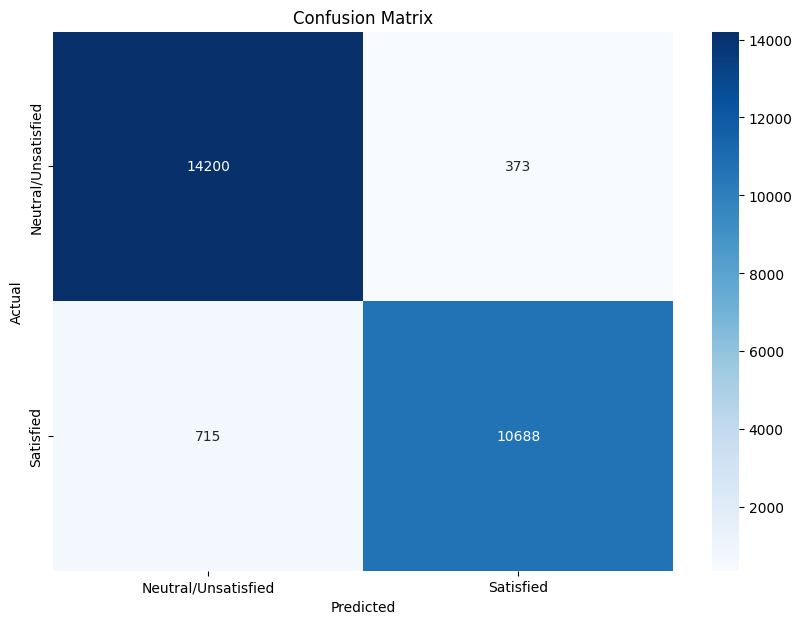

In [44]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Neutral/Unsatisfied', 'Satisfied'], yticklabels=['Neutral/Unsatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
